In [1]:
import vaccontrib as vc
from vaccontrib.linalg import convert_2d_block_to_4d_matrix, convert_4d_matrix_to_2d_block
import numpy as np
from numpyarray_to_latex.jupyter import to_jup
from IPython.display import display, Math
import bfmplot as bp
import matplotlib.pyplot as pl
%matplotlib widget

In [2]:
%matplotlib widget

In [3]:
def plot_reduced_contribution_matrix_and_Reff(
        C_red,
        subscript='',
        superscript='',
    ):
    if not subscript.startswith('_'):
        if not subscript == '':
            subscript = '_{'+subscript+'}'
    if not superscript.startswith('^'):
        if not subscript == '':
            superscript = '^{'+superscript+'}'
    to_jup(C_red,prefix='C'+superscript+subscript+'=')
    R_eff = (C_red.sum(axis=0))
    to_jup(R_eff,prefix='R'+superscript+subscript+'=',is_row_vector=False)
    


def plot_reduced_contribution_matrix_and_Reff_for_all_R_combinations(
        variant,
        base_R0,
        subscript='',
        superscript='',
        is_homogeneous=False,
        V=5,
    ):
    
    for unvacc_R in [base_R0,1.,0.]:
        display('# ================')
        display("# R0_unvacc = "+ str(unvacc_R))
        for is_homogeneous in [False, True]:
            R0 = [unvacc_R] + (V-1) * [base_R0]
            this_subscript = str(subscript)
            if is_homogeneous:
                C = vc.covid.get_homogeneous_contribution_matrix_covid(R0,variant)
                if not this_subscript == '':
                    this_subscript = this_subscript + ','
                this_subscript += '\mathrm{hom}'
            else:
                C = vc.covid.get_reduced_vaccinated_susceptible_contribution_matrix_covid(R0,variant)
            print_reduced_contribution_matrix_and_Reff(C,this_subscript,superscript)
        

In [4]:
#print_reduced_contribution_matrix_and_Reff_for_all_R_combinations(
#    variant='delta',
#    base_R0=6.,
#    subscript=r'\delta'
#)

In [5]:
#print_reduced_contribution_matrix_and_Reff_for_all_R_combinations(
#    variant='alpha',
#    base_R0=4.,
#    subscript=r'\alpha'
#)

<IPython.core.display.Math object>

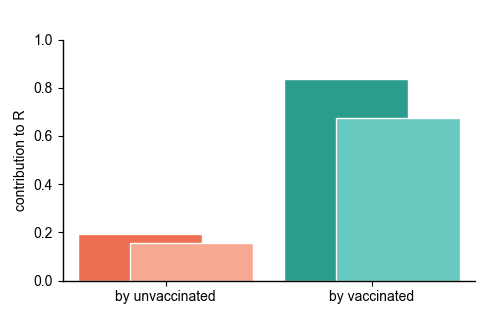

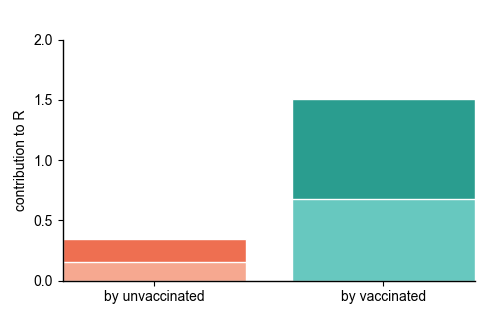

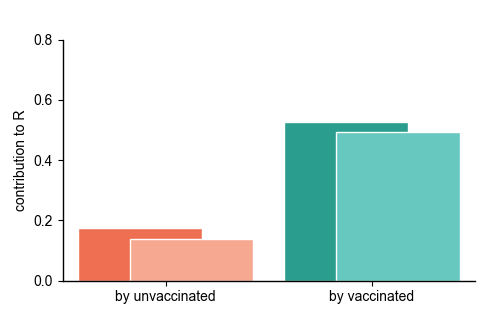

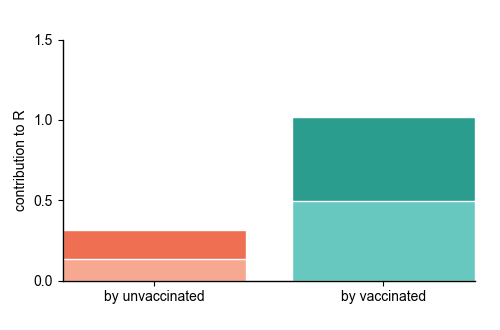

In [6]:
from vaccontrib.plot import plot_reduced_contribution_matrix, plot_reduced_contribution_matrix_stacked
Chom = vc.covid.get_homogeneous_contribution_matrix_covid([1.,6.],'delta')
C = vc.covid.get_reduced_vaccinated_susceptible_contribution_matrix_covid([1.,6,6,6,6],variant='delta')
K = vc.covid.get_next_generation_matrix_covid([1.,6,6,6,6],variant='delta')
y = vc.get_eigenvector(K)
y = y.sum(axis=0)
y = np.array([y[0],y[1:].sum()])
to_jup(y)
#C = get_homogeneous_contribution_matrix('alpha',[4.,4.])
#print(C)
#C = np.arange(9).reshape(3,3)[::-1,:]

ax = plot_reduced_contribution_matrix(Chom,0.6)
ax = plot_reduced_contribution_matrix_stacked(Chom)
ax = plot_reduced_contribution_matrix(C,0.6)
ax = plot_reduced_contribution_matrix_stacked(C)

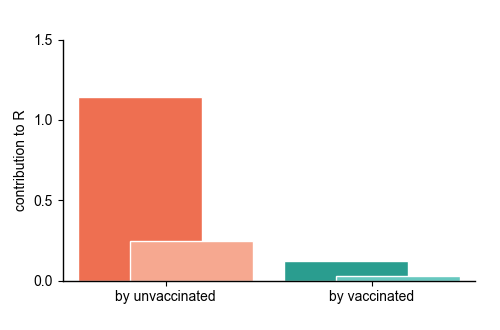

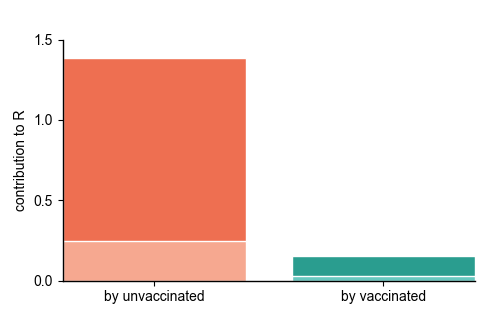

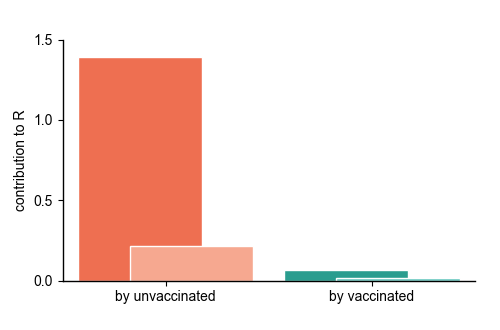

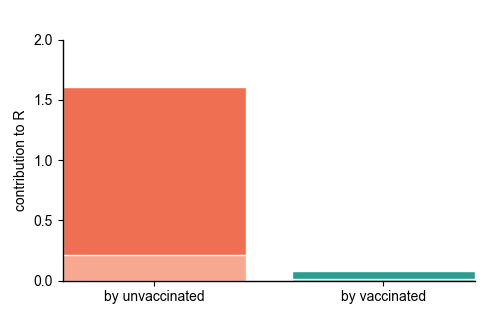

In [7]:

Chom = vc.covid.get_homogeneous_contribution_matrix_covid([4.,4.],'alpha')
C = vc.covid.get_reduced_vaccinated_susceptible_contribution_matrix_covid([4.,4,4,4,4],variant='alpha')
#C = get_homogeneous_contribution_matrix('alpha',[4.,4.])
#print(C)
#C = np.arange(9).reshape(3,3)[::-1,:]

ax = plot_reduced_contribution_matrix(Chom,0.6)
ax = plot_reduced_contribution_matrix_stacked(Chom)
ax = plot_reduced_contribution_matrix(C,0.6)
ax = plot_reduced_contribution_matrix_stacked(C)

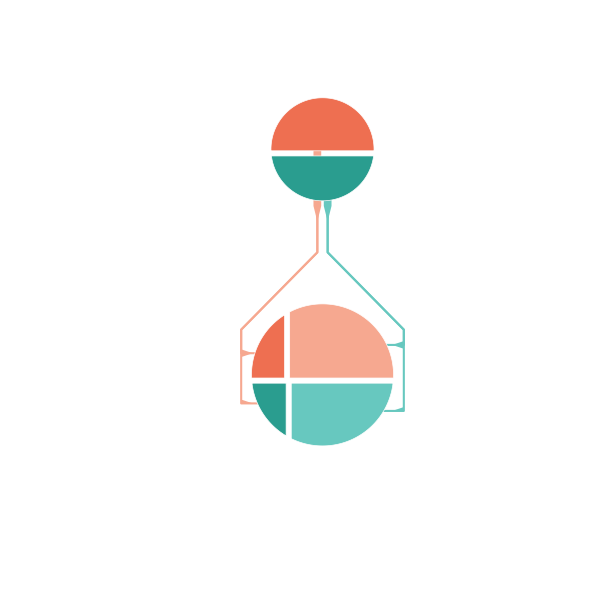

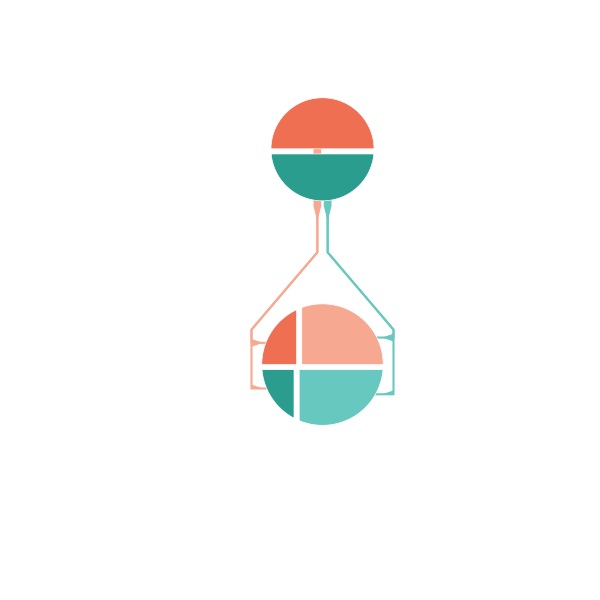

In [8]:
from vaccontrib.illustration import get_circular_vector_and_matrix_presentation

Chom = vc.covid.get_homogeneous_contribution_matrix_covid([1.,6.],'delta',)
C = vc.covid.get_reduced_vaccinated_susceptible_contribution_matrix_covid([1.,6,6,6,6],variant='delta')
K = vc.covid.get_next_generation_matrix_covid([1.,6,6,6,6],variant='delta')
y = vc.get_eigenvector(K)
y = y.sum(axis=0)
y = np.array([y[0],y[1:].sum()])
#C = get_homogeneous_contribution_matrix('alpha',[4.,4.])
#print(C)
#C = np.arange(9).reshape(3,3)[::-1,:]
yhom = vc.covid.get_homogeneous_eigenvector_covid(variant='delta')
pres = get_circular_vector_and_matrix_presentation(yhom, Chom)
ax = pres.plot()
pres.add_arrows_to_plot()
ax.set_ylim(-7,1.5)
ax.axis('off')

pres = get_circular_vector_and_matrix_presentation(y, C)
ax = pres.plot()
pres.add_arrows_to_plot()
ax.set_ylim(-7,1.5)
ax.axis('off')

ax.get_figure().savefig('delta_example_no_lockdown.pdf')
#ax = plot_reduced_contribution_matrix_stacked(Chom)
#ax = plot_reduced_contribution_matrix(C,0.6)
#ax = plot_reduced_contribution_matrix_stacked(C)

(-1.5, 1.5, -7.0, 1.5)

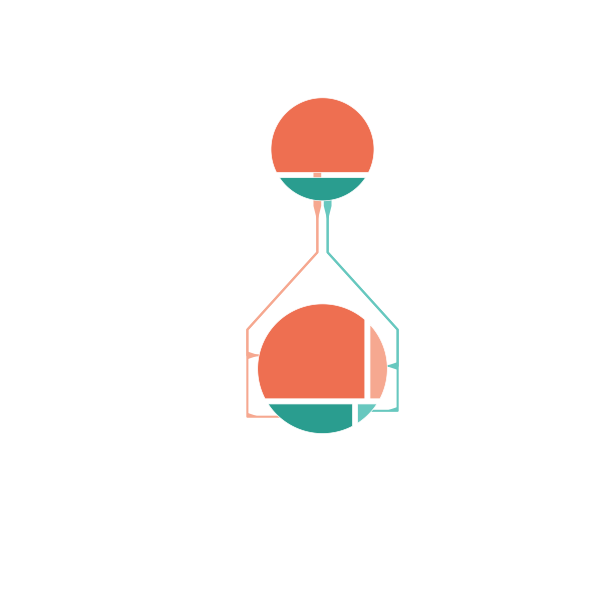

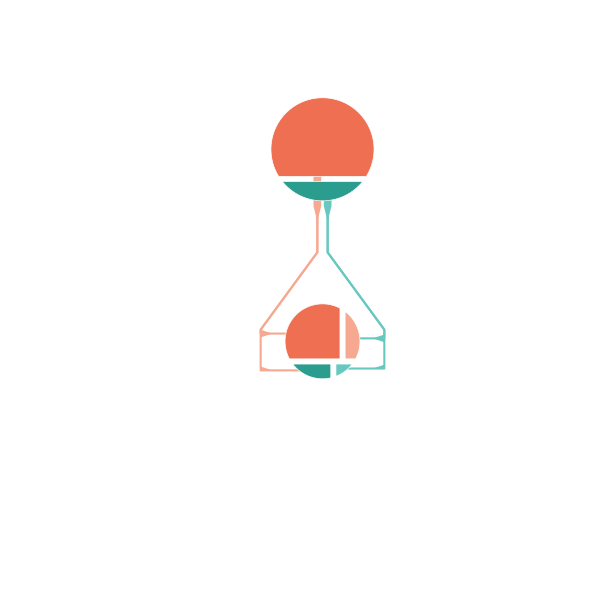

In [9]:
from vaccontrib.illustration import get_circular_vector_and_matrix_presentation

Chom = vc.covid.get_homogeneous_contribution_matrix_covid([4.,4.],'alpha')
Cred = vc.covid.get_reduced_vaccinated_susceptible_contribution_matrix_covid([1.,4,4,4,4],variant='alpha')
C = vc.covid.get_contribution_matrix_covid([4.,4,4,4,4],variant='alpha')
K = vc.covid.get_next_generation_matrix_covid([4.,4,4,4,4],variant='alpha')
y = vc.get_eigenvector(K)
yred = y.sum(axis=0)
yred = np.array([yred[0],yred[1:].sum()])
#C = get_homogeneous_contribution_matrix('alpha',[4.,4.])
#print(C)
#C = np.arange(9).reshape(3,3)[::-1,:]
yhom = vc.covid.get_homogeneous_eigenvector_covid(variant='alpha')

pres = get_circular_vector_and_matrix_presentation(yhom, Chom)
ax = pres.plot()
pres.add_arrows_to_plot()
ax.set_ylim(-7,1.5)
ax.axis('off')

pres = get_circular_vector_and_matrix_presentation(yred, Cred)
ax = pres.plot()
pres.add_arrows_to_plot()
ax.set_ylim(-7,1.5)
ax.axis('off')

#ax = plot_reduced_contribution_matrix_stacked(Chom)
#ax = plot_reduced_contribution_matrix(C,0.6)
#ax = plot_reduced_contribution_matrix_stacked(C)

In [ ]:
to_jup(Cred.sum(axis=1)/Cred.sum())
to_jup(yred/yred.sum())
to_jup(Chom.sum(axis=1)/Chom.sum())
to_jup(yhom/yhom.sum())


In [ ]:
C.sum()

In [ ]:
ynext = vc.linalg.convert_4d_matrix_to_2d_block(K).dot(y.flatten())
ynext /= ynext.sum()
ynext.reshape(4,5).sum(axis=0)

In [ ]:
y.sum(axis=0)

In [ ]:
ynext_from_C = C.sum(axis=-1).sum(axis=-2)
print(ynext_from_C)
ynext_from_C /= ynext_from_C.sum()
ynext_from_C.sum(axis=0)

In [ ]:
ynext = vc.linalg.convert_4d_matrix_to_2d_block(K).dot(y.flatten())
ynext.sum()

In [ ]:
C.sum()

In [ ]:
Chom.sum()

In [ ]:
Khom = vc.covid.get_homogeneous_next_generation_matrix_covid([1.,4.],'alpha')
Chom = vc.covid.get_homogeneous_contribution_matrix_covid([1.,4.],'alpha')
yhom = vc.covid.get_homogeneous_eigenvector_covid('alpha')
print(Khom.dot(yhom)/Khom.dot(yhom).sum())
print(yhom)
print(Chom.sum(axis=1)/Chom.sum())

In [ ]:
Khom.dot(np.diag(yhom))

In [ ]:
Chom

In [ ]:
R, y = vc.linalg.get_spectral_radius_and_eigenvector(Khom)

In [ ]:
R

In [ ]:
y

In [ ]:
yhom

In [ ]:
Chom.sum()